In [1]:
%pwd

'/data/datnt3/text-normalization/data_storage'

In [ ]:
#!REMOVE WRONG TAG GPT
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/processed/retagged_data_cleaned.csv"
file = pd.read_csv(file)



for _, row in file.iterrows():
  

In [8]:
import re

dmy1 = "12/3/ 2024"
d1, m1, y1 = re.split(r"[/.]", dmy1)

In [9]:
print(d1)
print(m1)
print(y1)

12
3
 2024


In [12]:
from ctnx import num_to_words

num_to_words(d1)

'mười hai'

In [8]:
import re
value = "ngay 30/4/2025 - ngay 30/4/2030"

for part in re.split(r"-", value):
  print(part)

ngay 30/4/2025 
 ngay 30/4/2030


In [14]:
import re
from ctnx import num_to_words

def dmydmy_convert(value: str) -> str:
    spoken_words = []

    value = value.strip()
    parts = re.split(r"[-–—−]", value)
    if len(parts) != 2:
      print("Wrong format")
      return value

    for i in range(len(parts)):
      parts[i] = parts[i].strip()
      prefix_match = re.match(r"^(ngày|sáng|trưa|chiều|tối)\s*", parts[i])
      prefix = ""
      if prefix_match:
          prefix = prefix_match.group(1) + " "
          value_part = parts[i][prefix_match.end():]  
          day, month, year = re.split(r"[\.\/]", value_part)
          if prefix == "ngày ":
            spoken_words.append(f"{prefix}{num_to_words(day)} tháng {num_to_words(month)} năm {num_to_words(year)}")
          else:
            spoken_words.append(f"{prefix}ngày {num_to_words(day)} tháng {num_to_words(month)} năm {num_to_words(year)}")
      else:
          value_part = parts[i]
          day, month, year = re.split(r"[\.\/]", value_part)
          spoken_words.append(f"ngày {num_to_words(day)} tháng {num_to_words(month)} năm {num_to_words(year)}")
    
    return " đến ".join(spoken_words) 

In [17]:
print(dmydmy_convert("ngày 24/4/1975 - 20/3/ 2025"))

ngày hai mươi tư tháng bốn năm một nghìn chín trăm bảy mươi lăm đến ngày hai mươi tháng ba năm hai nghìn không trăm hai mươi lăm


In [19]:
from vietnam_number import n2w, n2w_single

number = '2'
print(n2w(number))

n2w_single('8428- 3910.2522')

hai


'tám bốn hai tám ba chín một không hai năm hai hai'

In [4]:
from num2words import num2words
print(num2words(902, lang="vi"))

chín trăm lẻ hai


In [1]:
from vinorm import TTSnorm
S=TTSnorm("cần cho trẻ vệ sinh răng miệng bằng dung dịch nacl 0,9% hoặc pha nước ấm với muối (1 muỗng 5g muối pha với 240ml nước ấm).")
print(S)


cần cho trẻ vệ sinh răng miệng bằng dung dịch nacl không phẩy chín phần trăm hoặc pha nước ấm với muối một muỗng năm giờ muối pha với hai trăm bốn mươi mi li lít nước ấm .. 


In [ ]:
NSW_LIST = [
    "dmdmy",
    "ddmy",
    "dmdm",
    "dmydmy",
    "mymy",
    "dmy",
    "mmy", 
    "qqy",
    "ddm",
    "qq",
    "dd",
    "mm",
    "yy",
    "my",
    "dm",
    "qy",
    "hmshms",
    "hmhm",
    "msms",
    "hms",
    "hh",
    "t_mm",
    "ss",
    "hm",
    "ms",
    "hour",
    "tel",
    "math_operator",
    "currency_range",
    "currency",
    "measure_range",
    "measure",
    "num_int",
    "num_int1",
    "num_float",
    "range",
    "roman",
    "roman_range",
    "score",
    "fraction",
    "ratio",
    "hour_measure",
    "num/num",
    "num-num",
    "num.num",
    "num:num"
]

In [3]:
import re

# Sắp xếp từ dài đến ngắn để ưu tiên loại dài hơn
NSW_LIST.sort(key=len, reverse=True)
nsw_pattern = "|".join(NSW_LIST)

# Regex khớp ~...#nsw_type
pattern = r"~(.*?)#(" + nsw_pattern + r")\b"
compiled_pattern = re.compile(pattern)
print(pattern)

# Test
# test_str = "theo kế hoạch, ~15#num_int tổ công tác ~141#num_int sẽ chốt trực từ ~22#num_inth đêm nay, ~30/1#num/num"
# matches = compiled_pattern.findall(test_str)
# print(matches)


~(.*?)#(currency_range|math_operator|measure_range|hour_measure|roman_range|num_float|currency|num_int1|fraction|measure|num_int|num/num|num-num|num.num|num:num|dmydmy|hmshms|dmdmy|range|roman|score|ratio|ddmy|dmdm|mymy|hmhm|msms|t_mm|hour|dmy|mmy|qqy|ddm|hms|tel|qq|dd|mm|yy|my|dm|qy|hh|ss|hm|ms)\b


In [3]:
len(NSW_LIST)

41

In [21]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/2025-05-26/eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

930 1364
0.6818181818181818


In [22]:
prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"]
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1


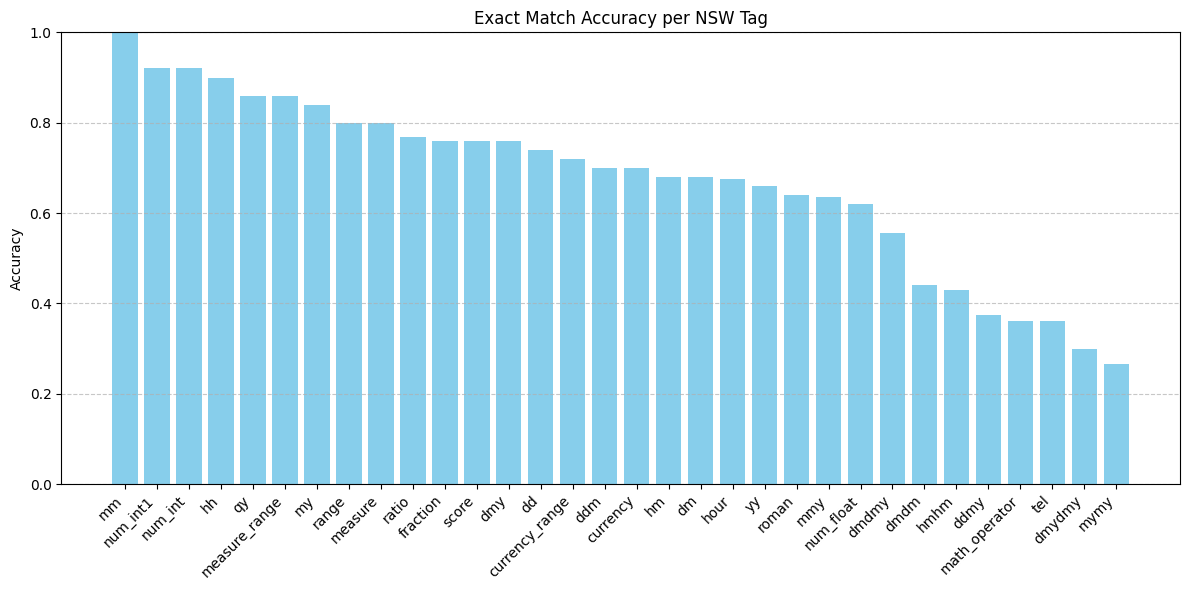

In [24]:
import matplotlib.pyplot as plt

# Calculate accuracy for each tag
tags = []
accuracies = []

for tag, values in prob_nsw_dict.items():
    tags.append(tag)
    accuracies.append(values["true"] / values["total"] if values["total"] > 0 else 0)

# Sort by accuracy for better visualization
sorted_data = sorted(zip(tags, accuracies), key=lambda x: x[1], reverse=True)
tags, accuracies = zip(*sorted_data)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(tags, accuracies, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Exact Match Accuracy per NSW Tag")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:
prob_nsw_dict

{'mmy': {'true': 7, 'total': 11},
 'hmhm': {'true': 6, 'total': 14},
 'dmdmy': {'true': 10, 'total': 18},
 'mm': {'true': 10, 'total': 10},
 'ratio': {'true': 10, 'total': 13},
 'mymy': {'true': 4, 'total': 15},
 'ddmy': {'true': 15, 'total': 40},
 'hour': {'true': 29, 'total': 43},
 'dmydmy': {'true': 15, 'total': 50},
 'hh': {'true': 45, 'total': 50},
 'currency_range': {'true': 36, 'total': 50},
 'dmdm': {'true': 22, 'total': 50},
 'math_operator': {'true': 18, 'total': 50},
 'ddm': {'true': 35, 'total': 50},
 'yy': {'true': 33, 'total': 50},
 'roman': {'true': 32, 'total': 50},
 'qy': {'true': 43, 'total': 50},
 'dd': {'true': 37, 'total': 50},
 'tel': {'true': 18, 'total': 50},
 'fraction': {'true': 38, 'total': 50},
 'currency': {'true': 35, 'total': 50},
 'measure_range': {'true': 43, 'total': 50},
 'hm': {'true': 34, 'total': 50},
 'score': {'true': 38, 'total': 50},
 'dmy': {'true': 38, 'total': 50},
 'num_float': {'true': 31, 'total': 50},
 'range': {'true': 40, 'total': 50},

In [14]:
import pandas as pd

eval_file ="/data/datnt3/text-normalization/data_storage/eval/eval_vn-llama3.2-1b-finetuned-300k.csv"
test_file = "/data/datnt3/text-normalization/data_storage/train_test/test_data.csv"

eval_df = pd.read_csv(eval_file)
test_df = pd.read_csv(test_file)

tagged_sentences, gpt_tagged_sentences, final_tagss = [], [], []
for _, row in eval_df.iterrows():
  tagged_sentence = test_df[test_df["input"] == row["input"]]["tagged_sentence"].iloc[0]
  print(tagged_sentence)
  gpt_tagged_sentence = test_df[test_df["input"] == row["input"]]["gpt_tagged_sentence"].iloc[0]
  final_tags = test_df[test_df["input"] == row["input"]]["final_tags"].iloc[0]
  
  tagged_sentences.append(tagged_sentence)
  gpt_tagged_sentences.append(gpt_tagged_sentence)
  final_tagss.append(final_tags)

eval_df["tagged_sentence"] = tagged_sentences
eval_df["gpt_tagged_sentence"] = gpt_tagged_sentences
eval_df["final_tags"] = final_tagss



từ ~tháng 2-4/2017#mmy, liên tiếp ~3#num_int nghi phạm trong “danh sách ~100#num_int” là vương kiến thành, vương giai triết, lý thế kiều lần lượt về nước tự thú…
kết quả điều tra xác định, từ ~tháng 1-7/2019#mmy, phan đại hoàng đã chiếm đoạt của công ty tổng số tiền trên ~540#num_int triệu đồng.
trong bản tin nhận định xu thế khí tượng từ ~tháng 5-10/2022#mmy, chuyên gia cho biết, nắng nóng tại bắc bộ và trung bộ năm nay khả năng xuất hiện muộn hơn so với trung bình các năm.
hiệp hội cũng đề nghị chính phủ xem xét chỉ đạo bảo hiểm xã hội việt nam cho phép gia hạn ~5#num_int tháng đối với tiền nợ bảo hiểm xã hội của ~tháng 03-06/2020#mmy đối với các doanh nghiệp, trong đó có doanh nghiệp bất động sản.
còn nhớ ~tháng 5-6/2014#mmy, trong những ngày hà nội nắng nóng cực điểm, chung cư mất nước toàn diện...
đáng chú ý, từ ~tháng 5-8/2020#mmy, bà nga đưa ra thông tin gian dối về việc cần tiền mua cặp sách, bàn ghế, văn phòng phẩm và vật dụng khác để vay gần ~1,4#num_float tỷ đồng của nông vă

In [17]:
eval_df.tail(1)

,input,label,predicted_label,tagged_sentence,gpt_tagged_sentence,final_tags
1280,"đáng chú ý, tiến có 3 tiền án về tội trộm cắp ...","đáng chú ý, tiến có ba tiền án về tội trộm cắp...","đáng chú ý, tiến có ba tiền án về tội trộm cắp...","đáng chú ý, tiến có ~3#num_int tiền án về tội ...",NaN,num_int


In [19]:
eval_df.to_csv("/data/datnt3/text-normalization/data_storage/eval/new_eval_vn-llama3.2-1b-finetuned-300k.csv", index=False, encoding="utf-8")

In [17]:
%cd ..

/Users/datnt/Desktop/code/text-normalization


In [10]:
import json

# str = '''{"__complex__": true'''
str = '''
[
  {
    "input": "Riêng tại SEA Games 25 vào năm 2009 ở Lào, đội tuyển bóng bàn Việt Nam cực kỳ đồng đều.",
    "s_output": "Riêng tại SEA Games hai mươi lăm vào năm hai nghìn không trăm chín ở Lào, đội tuyển bóng bàn Việt Nam cực kỳ đồng đều."
  },
  {
    "input": "Khi đó, 3 tay vợt của đội nam là Đoan Kiến Quốc, Trần Tuấn Quỳnh và Đinh Quang Linh gần như ngang nhau về mặt trình độ.",
    "s_output": "Khi đó, ba tay vợt của đội nam là Đoan Kiến Quốc, Trần Tuấn Quỳnh và Đinh Quang Linh gần như ngang nhau về mặt trình độ."
  }
]'''
res = json.loads(str)
print(type(res))
res[0]["input"]

<class 'list'>


'Riêng tại SEA Games 25 vào năm 2009 ở Lào, đội tuyển bóng bàn Việt Nam cực kỳ đồng đều.'

In [50]:
import re

# Path to your log file
log_file_path = "data_label.log"

# List to store the extracted paragraphs
extracted_paragraphs = []

# Regex pattern to capture text between 'Finish processing paragraph' and 'INFO: ================================'
pattern = re.compile(r'Finish processing paragraph \d+\n(.*?)\n\d{2}:\d{2}:\d{2} INFO: ================================', re.DOTALL)

# Open and read the log file
with open(log_file_path, 'r', encoding='utf-8') as log_file:
    log_content = log_file.read()
    
    # Find all matches for the pattern
    matches = pattern.findall(log_content)
    
    # Store the extracted paragraphs
    extracted_paragraphs.extend(matches)

# Printing the extracted paragraphs (optional)
# for i in range(5):
#   print(extracted_paragraphs[i])

# You can then save the extracted paragraphs to a CSV file if needed
print(len(extracted_paragraphs))


2736


In [5]:
len(extracted_paragraphs) 
extracted_paragraphs[1500]

'Sau chức vô địch bun-de-liga và champions lếch, ba-yer munich bước vào trận chung kết đê-ê-ép cúp (cúp quốc gia đức) với cơ hội trở thành đội bóng đức đầu tiên làm nên cú ăn ba lịch sử. So với trận chung kết champions lếch, đội hình ra quân của ba-yer munich có hai sự thiếu vắng đáng kể khi trung vệ đan-te và tiền vệ lu-iz gu-ta-xtô không thể cùng đồng đội tham dự trận đấu tại béc-lin vì bận tập trung cùng đội tuyển bra-xin chuẩn bị cho côn-fed cúp.  \nBa-yer munich trải qua chín mươi phút nhọc nhằn trước s-tút-gác. Ngoài ra huấn luyện viên jupp hayn-ke-s cũng có sự thay đổi bất ngờ ở vị trí trung phong khi sử dụng ma-ri-ô go-mez thi đấu ngay từ đầu thay vì ma-ri-ô man-đu-kích. Tương tự như trận chung kết champions lếch, ba-yer munich là đội nhập cuộc chậm hơn và để cho đối phương lấn lướt về mặt thế trận lẫn số cơ hội ăn bàn. Khung thành của thủ môn no-uy-er liên tục bị chao đảo bởi những pha dàn xếp tấn công sắc sảo của s-tút-gác mà đáng kể nhất là hai pha dứt điểm của ma-xim

In [43]:
from typing import List
import pandas as pd
# from core.config.config import LABELED_DATA_DIR, LABELED_DATA_FILE
LABELED_DATA_DIR = "data_storage/processed"
LABELED_DATA_FILE = "processed_data.csv"
import os


def save_datas_to_file(labeled_datas: List) -> None:
      data_dict = {"labeled_datas": labeled_datas}
      
      df = pd.DataFrame(data_dict)
      if not os.path.exists(LABELED_DATA_DIR):
        os.makedirs(LABELED_DATA_DIR, exist_ok=True)
        
      df.to_csv(os.path.join(LABELED_DATA_DIR, LABELED_DATA_FILE), mode="a", index=False)

In [51]:
save_datas_to_file(extracted_paragraphs)

In [52]:
import pandas as pd 
file = "data_storage/processed/processed_data.csv"

df = pd.read_csv(file)

In [34]:
import pandas as pd 
file = "data_storage/processed/processed_data_test.csv"

with open(file, mode='r') as f:
  lines = f.readlines()
  print(len(lines))
  for line in lines:
    print(line.strip() + "\n")

18
MU có một trận thắng dễ dàng trên sân của QPR, đội khách đã ghi bàn mở tỷ số ở phút hai mươi ba sau một cú sút rất đẹp mắt của ra-fa-el, bàn thắng ấn định tỷ số hai không được giggs ghi ở phút tám mươi. Chiến thắng cho MU là hoàn toàn xứng đáng, bởi suốt cả trận QPR không có mổi một tình huống khiến khung thành của đội đầu bảng chao đảo.

Vòng hai mươi bảy Premier League liverpool năm không swansea Thứ bảy, hai mươi ba tháng hai năm hai nghìn mười ba fulham một không stoke city arsenal hai một aston villa norwich hai một everton QPR không hai MU reading không ba wigan west brom hai một sunderland Chủ nhật, hai mươi bốn tháng hai năm hai nghìn mười ba man city - chelsea (hai mươi giờ ba mươi) newcastle - southampton Thứ ba, hai mươi sáu tháng hai năm hai nghìn mười ba

west ham - tottenham ba giờ không. Tuy nhiên, đây không phải trận đấu hay của MU như thường lệ. Các trận đấu gần đây người hâm mộ thường xuyên được chứng kiến một MU máu lửa, tấn công nhiệt tình. Điều đó đã không xảy r

In [53]:
df.__len__()

2737

In [54]:
df.tail(1)

,labeled_datas
2736,MU có một trận thắng dễ dàng trên sân của quyê...


In [8]:
import pandas as pd
data = pd.read_csv("processed/retagged_data_cleaned.csv")

In [4]:
data.head()

,input,s_output,tagged_sentence,tags,gpt_tagged_sentence,gpt_tags,final_tags
0,cú dứt điểm ngay sát vòng 16m50 của tiền vệ ng...,cú dứt điểm ngay sát vòng mười sáu mét năm mươ...,cú dứt điểm ngay sát vòng ~16m50#measure của t...,measure,NaN,NaN,measure
1,điểm chung giữa mạc hồng quân và hà minh tuấn ...,điểm chung giữa mạc hồng quân và hà minh tuấn ...,điểm chung giữa mạc hồng quân và hà minh tuấn ...,measure,NaN,NaN,measure
2,trong khi 2 đối thủ chính của mình là nguyễn v...,trong khi hai đối thủ chính của mình là nguyễn...,trong khi ~2#num_int đối thủ chính của mình là...,measure; num_int,NaN,NaN,measure; num_int
3,"ở nội dung ném búa nữ, vđv phạm thị thanh trúc...","ở nội dung ném búa nữ, vđv phạm thị thanh trúc...","ở nội dung ném búa nữ, vđv phạm thị thanh trúc...",measure; num_int,NaN,NaN,measure; num_int
4,v. ninh bình được hưởng quả đá phạt cố định ph...,v. ninh bình được hưởng quả đá phạt cố định ph...,v. ninh bình được hưởng quả đá phạt cố định ph...,measure,NaN,NaN,measure


In [14]:
for idx, row in data.iterrows():
    if  pd.notna(row["tagged_sentence"]) and pd.notna(row["gpt_tagged_sentence"]):
        print(row["tagged_sentence"])
        print(row["gpt_tagged_sentence"])
        break

carletto bắt đầu được chú ý nhiều từ khi dẫn dắt parma ở mùa giải ~1996-1997#num-num và tại đây, luca bucci - thủ thành cao ~1m80#measure, chỉ trụ lại được đúng ~7#num_int trận trước khi bị thay thế bởi gianluigi buffon cao ~1m91#measure.
carletto bắt đầu được chú ý nhiều từ khi dẫn dắt parma ở mùa giải ~1996-1997#range và tại đây, luca bucci - thủ thành cao ~1m80#measure, chỉ trụ lại được đúng ~7#num_int trận trước khi bị thay thế bởi gianluigi buffon cao ~1m91#measure.


In [16]:
data.shape

(303916, 7)

In [22]:
test_sentence = "tiểu ban điều trị ban chỉ đạo quốc gia phòng, chống dịch covid-19 thông báo có 106 ca tử vong do covid-19 (số 525-630) từ ngày 19-26/7/2021 tại 6 tỉnh, thành phố sau:"

In [27]:
input = data[data["input"] == """- tại thành phố hồ chí minh từ ngày 19-26/7: 91 ca
- tại tỉnh bà rịa - vũng tàu ngày 20/7: một ca.
- tại đồng tháp từ ngày 23-24/7: 2 ca.
- tại đồng nai ngày 25/7: một ca.
- tại kiên giang ngày 26/7: 2 ca.
- tại long an ngày 22-26/7: 9 ca."""]["input"]


In [28]:
print(input)

122696    - tại thành phố hồ chí minh từ ngày 19-26/7: 9...
Name: input, dtype: object


In [9]:
import re
from tqdm import tqdm

def get_regex(text):
    pattern = r'~(.*?)#(currency_range|math_operator|measure_range|hour_measure|roman_range|num_float|currency|num_int1|fraction|measure|num_int|num/num|num-num|num\.num|num\:num|dmydmy|hmshms|dmdmy|range|roman|score|ratio|ddmy|dmdm|mymy|hmhm|msms|t_mm|hour|dmy|mmy|qqy|ddm|hms|tel|qq|dd|mm|yy|my|dm|qy|hh|ss|hm|ms)'
    matches = re.finditer(pattern, text)
    
    return [(match.group(), match.group(2), match.start(), match.end()) for match in matches]

ignore_list = ["hour_measure", "num-num", "num/num", "num.num", "num:num"]
remove_indexes = []
final_tags = []
gpt_tagged_sentences = []

for row_idx, row in tqdm(data.iterrows()):
    final_tag = []
    if  pd.notna(row["tagged_sentence"]) and pd.notna(row["gpt_tagged_sentence"]):
        tagged_sentence = row["tagged_sentence"]
        gpt_tagged_sentence = row["gpt_tagged_sentence"]
        # print(tagged_sentence)
        # print(gpt_tagged_sentence)
        regex_matches_tagged_sentence = get_regex(tagged_sentence)
        regex_matches_gpt_tagged_sentence = get_regex(gpt_tagged_sentence)
        
        if not len(regex_matches_tagged_sentence) == len(regex_matches_gpt_tagged_sentence):
            remove_indexes.append(row_idx)
            final_tags.append(row["final_tags"])
            gpt_tagged_sentences.append(row["gpt_tagged_sentence"])
            continue
        else:
            for idx in range(len(regex_matches_tagged_sentence)-1, -1, -1):
                match_item = regex_matches_tagged_sentence[idx]
                if match_item[1] in ignore_list:
                    if regex_matches_gpt_tagged_sentence[idx][1] not in ignore_list:
                        final_tag.append(regex_matches_gpt_tagged_sentence[idx][1])
                        continue
                    else:
                        remove_indexes.append(row_idx)
                        final_tag.append(regex_matches_gpt_tagged_sentence[idx][1])
                        continue
                        # gpt_tagged_sentences.append(row["gpt_tagged_sentence"])
                elif match_item[1] != regex_matches_gpt_tagged_sentence[idx][1]:
                    final_tag.append(regex_matches_tagged_sentence[idx][1])
                    start = regex_matches_gpt_tagged_sentence[idx][2]
                    end = regex_matches_gpt_tagged_sentence[idx][3]
                    
                    gpt_tagged_sentence = gpt_tagged_sentence[:start] + match_item[0] + gpt_tagged_sentence[end:]
                elif match_item[1] == regex_matches_gpt_tagged_sentence[idx][1]:
                    final_tag.append(regex_matches_gpt_tagged_sentence[idx][1])
                    
            final_tag = list(set(final_tag))

            final_tags.append("; ".join(final_tag))
            gpt_tagged_sentences.append(gpt_tagged_sentence)
        
    
    else:
        # print("error")
        final_tags.append(row["final_tags"])
        gpt_tagged_sentences.append(row["gpt_tagged_sentence"])

0it [00:00, ?it/s]

303916it [00:05, 55352.68it/s]


In [10]:
len(final_tags), len(gpt_tagged_sentences)

(303916, 303916)

In [15]:
data_cp = data.copy()

data_cp["final_tags"] = final_tags
data_cp["gpt_tagged_sentence"] = gpt_tagged_sentences

In [16]:
data_cp[data_cp["input"] == test_sentence].to_dict()

NameError: name 'test_sentence' is not defined

In [17]:
# data_cp.reset_index()
removed_data_cp = data_cp[~data_cp.index.isin(remove_indexes)]

In [11]:
print(len(remove_indexes))

749


In [12]:
print(remove_indexes[0])

256


In [13]:
data_cp.iloc[913].to_dict()

NameError: name 'data_cp' is not defined

In [18]:
removed_data_cp.iloc[256].to_dict()


{'input': 'như lưới sợi cáp 3mm sẽ áp giá 300.000 đồng/m2 đối với diện tích lắp đặt dưới 5m2, giá 220.000 đồng/m2 cho diện tích lắp đặt từ 10m2 trở lên.',
 's_output': 'như lưới sợi cáp ba milimet sẽ áp giá ba trăm nghìn đồng trên một mét vuông đối với diện tích lắp đặt dưới năm mét vuông, giá hai trăm hai mươi nghìn đồng trên một mét vuông cho diện tích lắp đặt từ mười mét vuông trở lên.',
 'tagged_sentence': 'như lưới sợi cáp ~3mm#measure sẽ áp giá ~300.000#num_int1 đồng/m~2#num_int đối với diện tích lắp đặt dưới ~5m2#measure, giá ~220.000#num_int1 đồng/m~2#num_int cho diện tích lắp đặt từ ~10m2#measure trở lên.',
 'tags': 'measure; num_int; num_int1',
 'gpt_tagged_sentence': nan,
 'gpt_tags': nan,
 'final_tags': 'measure; num_int; num_int1'}

In [19]:
removed_data_cp.shape, data_cp.shape

((303389, 7), (303916, 7))

In [20]:
removed_data_cp.to_csv("/data/datnt3/text-normalization/data_storage/processed/retagged_data_cleaned_v3.csv", index=False, encoding="utf-8")

In [21]:
import pandas as pd
df = pd.read_csv("/data/datnt3/text-normalization/data_storage/processed/retagged_data_cleaned_v3.csv")

rm_idxs=[]
for idx,row in df.iterrows():
  tags = row["final_tags"].split("; ")
  for tag in tags:
    tag = tag.strip()

    if tag=="ms":
      rm_idxs.append(idx)

removed_ms_df = df[~df.index.isin(rm_idxs)]


In [22]:
len(df), len(removed_ms_df)

(303389, 303324)

In [24]:
tag_counts = (
    removed_ms_df["final_tags"]
    .dropna()
    .str.split(";")
    .explode()
    .str.strip()
    .value_counts()
)

print(tag_counts)

final_tags
num_int           218317
dm                 50559
measure            43642
num_int1           25549
num_float          18151
range              16308
dmy                11261
my                  9887
score               5694
hm                  5530
measure_range       4473
currency            4045
fraction            3392
tel                 2072
qy                  1262
roman               1134
yy                   893
dd                   780
math_operator        693
ddm                  655
currency_range       410
dmdm                 407
hh                   369
dmydmy               339
hour                 216
ddmy                 201
mymy                 181
ratio                118
dmdmy                 96
hmhm                  70
mmy                   57
mm                    57
hms                   15
roman_range            9
ss                     7
t_mm                   2
Name: count, dtype: int64


In [26]:
len(removed_ms_df)

303324

In [27]:
removed_ms_df.to_csv("/data/datnt3/text-normalization/data_storage/processed/retagged_data_cleaned_v4.csv", index=False, encoding="utf-8")

In [25]:
import pandas as pd

# Fill NaN values with empty string, then split and check for 'num/num'
matches = removed_ms_df[df["final_tags"].fillna("").str.split(";").apply(lambda tags: "num/num" in tags)]

# Print matched rows
print(matches)


Empty DataFrame
Columns: [input, s_output, tagged_sentence, tags, gpt_tagged_sentence, gpt_tags, final_tags]
Index: []


/tmp/ipykernel_4066469/31481572.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matches = removed_ms_df[df["final_tags"].fillna("").str.split(";").apply(lambda tags: "num/num" in tags)]


In [ ]:
text = "thời gian bay dự kiến tăng thêm từ ~1-2#dm phút/chuyến bay, kéo theo ngày ~1-2#dm chi phí phát sinh từ khoảng ~10.600-21.200 usd#currency_range/chuyến bay."

pattern = r'~(.*?)#(currency_range|math_operator|measure_range|hour_measure|roman_range|num_float|currency|num_int1|fraction|measure|num_int|num/num|num-num|num\.num|num\:num|dmydmy|hmshms|dmdmy|range|roman|score|ratio|ddmy|dmdm|mymy|hmhm|msms|t_mm|hour|dmy|mmy|qqy|ddm|hms|tel|qq|dd|mm|yy|my|dm|qy|hh|ss|hm|ms)'
rxs = re.finditer(pattern, text)

print(rxs)

for rx in rxs:
    print(rx.group())
    



~60-120#num-num
~60-120#num-num
~10.600-21.200 usd#currency_range


In [8]:
for i in range(4,-1,-1):
  print(i)

4
3
2
1
0


In [28]:
import pandas as pd

# Load your file without triggering the DtypeWarning
df = pd.read_csv("/data/datnt3/text-normalization/data_storage/train_test/2025-05-25/train_data.csv", low_memory=False)

# Show inferred data types
print("Inferred dtypes:")
print(df.dtypes)

# Check rows where column 4 (tags) is NOT a string (should usually be str or NaN)
wrong_tags = df[~df['tags'].apply(lambda x: isinstance(x, str) or pd.isna(x))]

# Check rows where column 5 (gpt_tagged_sentence) is NOT a string
wrong_gpt_tagged = df[~df['gpt_tagged_sentence'].apply(lambda x: isinstance(x, str) or pd.isna(x))]

# Combine them for inspection
wrong_rows = pd.concat([wrong_tags, wrong_gpt_tagged]).drop_duplicates()

# Show problematic rows
print("Rows with mixed or wrong types in 'tags' or 'gpt_tagged_sentence':")
print(wrong_rows)


Inferred dtypes:
input                  object
s_output               object
tagged_sentence        object
tags                   object
gpt_tagged_sentence    object
gpt_tags               object
final_tags             object
test_tag               object
dtype: object
Rows with mixed or wrong types in 'tags' or 'gpt_tagged_sentence':
Empty DataFrame
Columns: [input, s_output, tagged_sentence, tags, gpt_tagged_sentence, gpt_tags, final_tags, test_tag]
Index: []


In [29]:
df["tags_type"] = df["tags"].apply(type)
df["gpt_tagged_sentence_type"] = df["gpt_tagged_sentence"].apply(type)

# Check all types that aren't string
non_str_types = df[
    (df["tags_type"] != str) | (df["gpt_tagged_sentence_type"] != str)
]

print(non_str_types[["tags", "tags_type", "gpt_tagged_sentence", "gpt_tagged_sentence_type"]])


                tags      tags_type gpt_tagged_sentence  \
0       mmy; num_int  <class 'str'>                 NaN   
1       mmy; num_int  <class 'str'>                 NaN   
2                mmy  <class 'str'>                 NaN   
3       mmy; num_int  <class 'str'>                 NaN   
4                mmy  <class 'str'>                 NaN   
...              ...            ...                 ...   
301908       num_int  <class 'str'>                 NaN   
301909       num_int  <class 'str'>                 NaN   
301910       num_int  <class 'str'>                 NaN   
301911       num_int  <class 'str'>                 NaN   
301912       num_int  <class 'str'>                 NaN   

       gpt_tagged_sentence_type  
0               <class 'float'>  
1               <class 'float'>  
2               <class 'float'>  
3               <class 'float'>  
4               <class 'float'>  
...                         ...  
301908          <class 'float'>  
301909          <cl

In [30]:
invalid_rows = df[
    ~df["tags"].apply(lambda x: isinstance(x, str)) |
    ~df["gpt_tagged_sentence"].apply(lambda x: isinstance(x, str))
]

print(invalid_rows)


                                                    input  \
0       giai đoạn 3 chiến dịch “trẻ em phải đội mũ bảo...   
1       các mẫu này được viện vệ sinh y tế công cộng l...   
2       điều này chỉ có thể thực hiện được vào ngày 4-...   
3       từ tháng 3 - 5/2013, đã sử dụng hết 3 hộp dung...   
4       thời gian tiến hành rà soát bắt đầu từ tháng 4...   
...                                                   ...   
301908  người chồng, người cha của các nạn nhân là ngu...   
301909  tuy nhiên, mới chỉ có 1 tuần thì chưa đủ để đư...   
301910  thủ tướng phạm minh chính cho biết việt nam và...   
301911  theo báo cáo của cơ quan cảnh sát điều tra côn...   
301912  3 đối tượng huỳnh, lý, tuấn bị tổng mức phạt h...   

                                                 s_output  \
0       giai đoạn ba chiến dịch “trẻ em phải đội mũ bả...   
1       các mẫu này được viện vệ sinh y tế công cộng l...   
2       điều này chỉ có thể thực hiện được vào ngày bố...   
3       từ tháng ba đến